In [1]:
import numpy as np


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# SVMクラスの定義（修正版）
class SVM:
    def __init__(self, n_iter=1000, LR=0.001):
        self.n_iter = n_iter  
        self.LR = LR
        self.weight = None
        self.bias = 0  

    def fit(self, X, y):
        n_sample, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weight) - self.bias)
                if condition < 1:
                    self.weight -= self.LR * ((2 * self.weight) / n_sample - np.dot(x_i, y_[idx]))
                    self.bias -= self.LR * y_[idx]
                # else:
                    # self.weight -= self.LR * (2 * self.weight / n_sample)

    def predict(self, X):  
        return np.sign(np.dot(X, self.weight) - self.bias)  


Test Accuracy: 100.00%


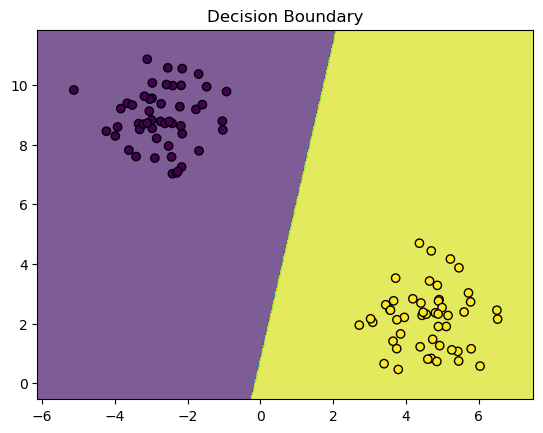

In [3]:

# データセットの生成
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # ラベルを-1と1に変換

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVMモデルのインスタンスを作成し、訓練データでフィット
svm = SVM(n_iter=1000, LR=0.001)
svm.fit(X_train, y_train)

# テストデータで予測し、精度を評価
predictions = svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 決定境界のプロット（オプショナル）
def plot_decision_boundary(svm, X, y):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(svm, X, y)
